In [111]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [112]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [113]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [114]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [115]:
# Find the table element you want to extract data from
table = soup.find('table')

# Initialize a list to store the data rows
data_rows = []

# Iterate through the rows of the table
for row in table.find_all('tr'):
    # Initialize a list to store the data for each row
    row_data = []
    
    # Iterate through the cells in the current row
    for cell in row.find_all('td'):
        # Extract the text from the cell and append it to the row_data list
        cell_text = cell.get_text(strip=True)
        row_data.append(cell_text)
    
    # Append the row_data list to the data_rows list
    data_rows.append(row_data)
data_rows

[[],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-7

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [116]:
# Create an empty list
mars_data=[]
# Loop through the scraped data to create a list of rows
for row in data_rows:
    mars_data.append(row)
    
# Extract the column names from the first row (tr element) in the table body (tbody)
column_names = [th.text.strip() for th in table.find('tbody').find('tr').find_all('th')]

# Now, 'column_names' contains the extracted column names
print(column_names)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [117]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df=pd.DataFrame(mars_data, columns=column_names)
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


In [118]:
# Confirm DataFrame was created successfully
#(delete the first row(index )
df = df.iloc[1:]
df.head(10), len(df)

(     id terrestrial_date sol   ls month min_temp pressure
 1     2       2012-08-16  10  155     6    -75.0    739.0
 2    13       2012-08-17  11  156     6    -76.0    740.0
 3    24       2012-08-18  12  156     6    -76.0    741.0
 4    35       2012-08-19  13  157     6    -74.0    732.0
 5    46       2012-08-20  14  157     6    -74.0    740.0
 6    57       2012-08-21  15  158     6    -78.0    740.0
 7    68       2012-08-22  16  158     6    -77.0    740.0
 8    79       2012-08-23  17  159     6    -76.0    742.0
 9   112       2012-08-27  21  161     6    -74.0    741.0
 10  114       2012-08-28  22  162     6    -74.0    742.0,
 1867)

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [119]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [120]:

# Change the data type of each column individually
df['id'] = df['id'].astype('str')  # Change 'id' to string
df['sol'] = df['sol'].astype(int)  # Change 'sol' to int64
df['ls'] = df['ls'].astype(int)  # Change 'ls' to int64
df['month'] = df['month'].astype(int)  # Change 'month' to int64
df['min_temp'] = df['min_temp'].astype(float)  # Change 'min_temp' to float64
df['pressure'] = df['pressure'].astype(float)  # Change 'pressure' to float64
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])


In [121]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [122]:
unique_month_count = df['month'].nunique()
unique_month_count

12

In [123]:
# 1. How many months are there on Mars?
month_counts = df['month'].value_counts()
month_counts

4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: month, dtype: int64

In [124]:
# 2. How many Martian days' worth of data are there?
days = df['terrestrial_date'].nunique()
days

1867

In [125]:
# 3. What is the average low temperature by month?
low_temp = df.groupby('month')['min_temp'].mean()
low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

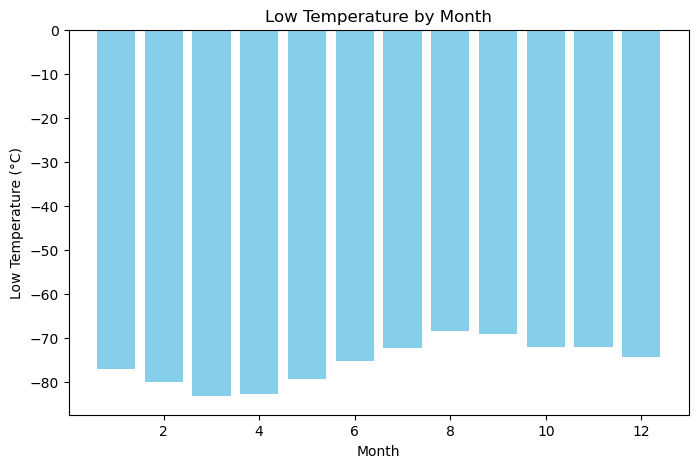

In [126]:
# Plot the average temperature by month
plt.figure(figsize=(8, 5))
plt.bar(low_temp.index, low_temp.values, color='skyblue')

# Set axis labels and title
plt.xlabel('Month')
plt.ylabel('Low Temperature (°C)')
plt.title('Low Temperature by Month')
plt.savefig('Avg_Temp.png')

In [127]:
# Identify the coldest and hottest months in Curiosity's location
#coldest temp (or min temp) from the average temp for the months in 'min_temp' columns
coldest = df.groupby('month')['min_temp'].mean().min()
#month that temp belongs to
coldest_month = df.groupby('month')['min_temp'].mean().idxmin()

# hottest temp (or MAX temp) from the average temp for the months in 'min_temp' columns
hottest = df.groupby('month')['min_temp'].mean().max()
#month that temp belongs to
hottest_month = df.groupby('month')['min_temp'].mean().idxmax()

#Print Results
print(f'Coldest Month: Month {coldest_month}, Temp:', coldest)
print(f'Hottest Month: Month {hottest_month}, Temp:', hottest)

Coldest Month: Month 3, Temp: -83.30729166666667
Hottest Month: Month 8, Temp: -68.38297872340425


In [128]:
# 4. Average pressure by Martian month
p = df.groupby('month')['pressure'].mean()
p

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

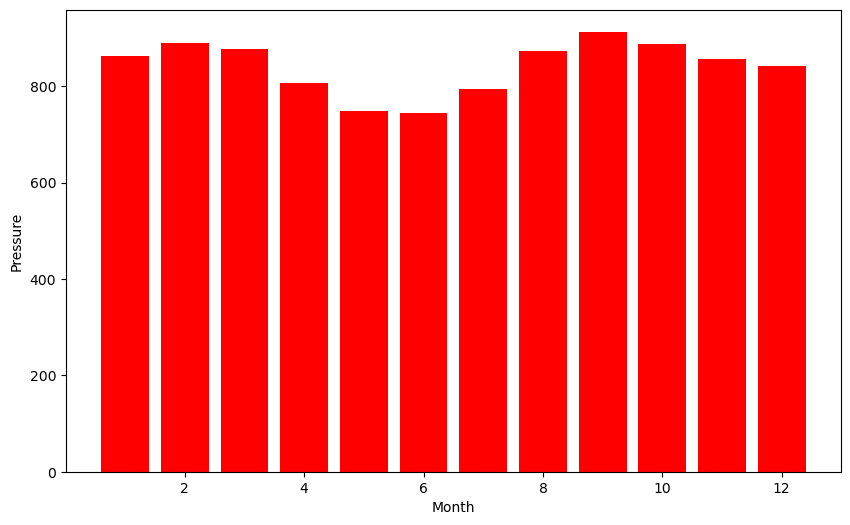

In [129]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
plt.bar(p.index, p.values,  color='red')

# Set axis labels and title
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.savefig('Avg_Pressure.png')

In [130]:
day_temp_df = df[['terrestrial_date','min_temp']]
day_temp_df

,terrestrial_date,min_temp
1,2012-08-16,-75.0
2,2012-08-17,-76.0
3,2012-08-18,-76.0
4,2012-08-19,-74.0
5,2012-08-20,-74.0
...,...,...
1863,2018-02-23,-78.0
1864,2018-02-24,-77.0
1865,2018-02-25,-76.0
1866,2018-02-26,-77.0


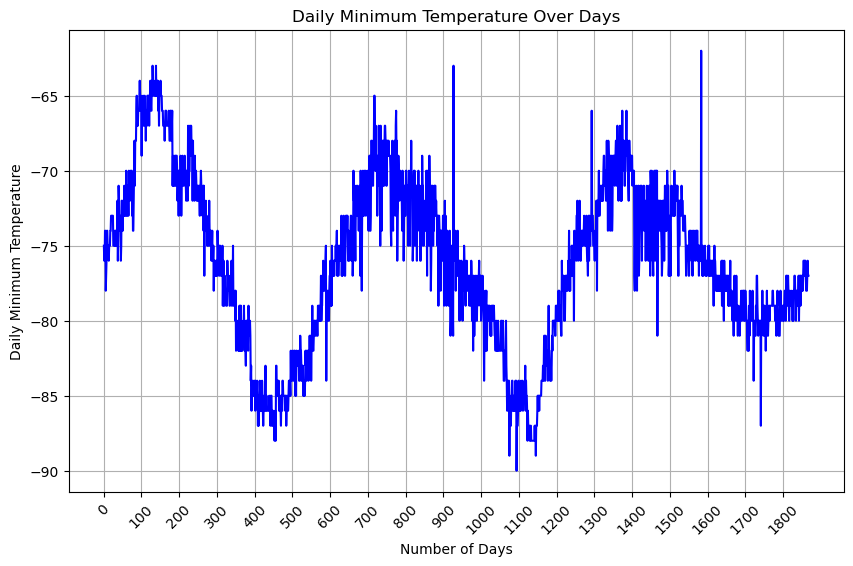

<Figure size 640x480 with 0 Axes>

In [131]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#rememeber 'days'= # of terrestrial date and 'min_temp' is defined above

# Create the line graph
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.plot(day_temp_df['terrestrial_date'].index, min_temp, linestyle='-', color='b', label='Minimum Temperature')

# Set the y-axis limits based on the count of unique dates
#plt.xlim(0, days)  # Set the lower limit to 0 and the upper limit to the count of unique dates

# Set x-axis and y-axis label
plt.ylabel('Daily Minimum Temperature')
plt.xlabel('Number of Days')

# Add a title
plt.title('Daily Minimum Temperature Over Days')



# Specify the x-axis tick positions and create more ticks so that the grid makes it easier to estimate the warmest and coldest days 
x_ticks = range(0, 1850, 100)
plt.xticks(x_ticks, rotation=45)
plt.grid()
plt.show()
plt.savefig('Mars_Year.png')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [132]:
# Write the data to a CSV
# Save 'df' to a CSV file
df.to_csv('Mars_Data.csv', index=False)

In [133]:
browser.quit()